## 이미지 처리 딥러닝
# CNN 개념

### 이미지 처리에 있어서 기존 신경망의 문제점
- 이미지 데이터를 1차원 배열로 처리
- 실제 이미지는 상하좌우의 필셀들과 연관되어 있다

### CNN (Convolutional Neural Network)
- Convolution : 이미지에 필터를 적용해 변환하는 기술
- Pooling : 이미지의 크기를 줄임
- 채널 : 칼러이미지는 RGB 3개의 채널이지만, 다수의 필터를 적용하며 많은 채널을 생성한다

<img src='https://community.arm.com/cfs-file/__key/communityserver-blogs-components-weblogfiles/00-00-00-21-42/Neural-Network-Model-Definition.jpg' />
(출처: https://community.arm.com/developer/ip-products/processors/b/processors-ip-blog/posts/deploying-convolutional-neural-network-on-cortex-m-with-cmsis-nn?CommentSortBy=CreatedDate&CommentSortOrder=Descending )<br>

<img src='cifar-10.jpg' />
(출처: https://arxiv.org/pdf/1611.04905.pdf )

<img src="https://ren-fengbo.lab.asu.edu/sites/default/files/styles/panopoly_image_full/public/fpga_accel_bcnn_fig_1.png?itok=bhU2jU8y" />
(출처: https://ren-fengbo.lab.asu.edu/content/gpu-outperforming-fpga-accelerator-architecture-binary-convolutional-neural-networks)

### Convolution
- 작은 크기의 필터를 적용해 이미지를 변환
- 하나의 이미지에 하나의 필터를 적용하면, 하나의 채널을 가진 이미지로 변환됨

<img src="conv_1.jpg" />

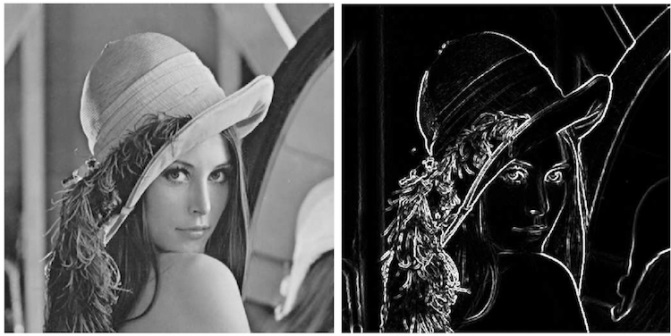

<img src="https://ren-fengbo.lab.asu.edu/sites/default/files/styles/panopoly_image_full/public/fpga_accel_bcnn_fig_2.png?itok=pyoIrUTC" />

### Pooling (sub-sampling)
- 이미지의 크기를 줄여준다
- 이미지를 격자로 나누어 최대값 또는 평균값을 뽑아낸다
- Max-Pooling : 격자에서 최대값을 뽑아내는 방법

<img src="pooling_1.jpg" />

### CNN의 목표
- 필터의 값들이 곧 **가중치** 이다
- 즉, CNN 은 이미지를 잘 표현하는 **필터** 를 찾아내는 것이 목표이다

### CNN 맛보기
- MNIST 에 적용

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [6]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

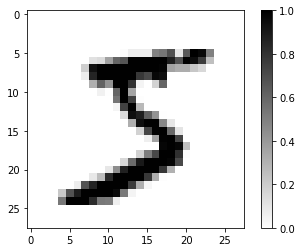

In [7]:
X_train = X_train.reshape(-1,28,28,1)/255.
X_test = X_test.reshape(-1,28,28,1)/255.

plt.imshow(X_train[0,:,:,0], cmap='gray_r')
plt.colorbar()

In [8]:
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, (3,3), padding='same',
                    activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                31370     
Total params: 68,938
Trainable params: 68,938
Non-trainable params: 0
__________________________________________________

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [13]:
history = model.fit(X_train, y_train, batch_size=128, epochs=5, validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 375s 992ms/step - loss: 0.6430 - acc: 0.8033 - val_loss: 0.0890 - val_acc: 0.9740
Epoch 2/5
375/375 [==============================] - 360s 960ms/step - loss: 0.0806 - acc: 0.9747 - val_loss: 0.0639 - val_acc: 0.9820
Epoch 3/5
375/375 [==============================] - 451s 1s/step - loss: 0.0516 - acc: 0.9846 - val_loss: 0.0545 - val_acc: 0.9846
Epoch 4/5
375/375 [==============================] - 415s 1s/step - loss: 0.0395 - acc: 0.9881 - val_loss: 0.0534 - val_acc: 0.9855
Epoch 5/5
375/375 [==============================] - 359s 956ms/step - loss: 0.0321 - acc: 0.9905 - val_loss: 0.0420 - val_acc: 0.9877


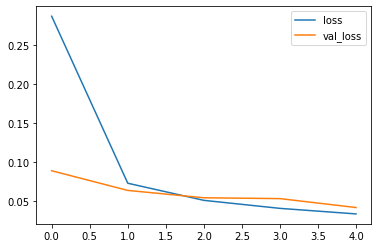

In [14]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

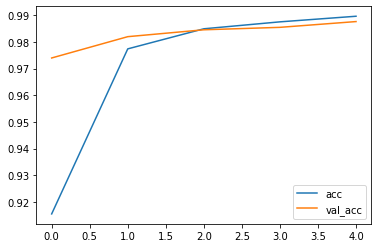

In [15]:
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.legend(['acc', 'val_acc'])

In [17]:
pred_y = model.predict(X_test)
pred_y.shape

(10000, 10)

In [19]:
(pred_y.argmax(axis=1)==y_test.argmax(axis=1)).mean()

0.9888